https://www.kaggle.com/competitions/energy-forecasting-data-challenge-public

https://www.kaggle.com/code/vipulgandhi/how-to-choose-right-metric-for-evaluating-ml-model#-Regression-Metrices-

In [1]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from keras.models import model_from_json

# Import the data

In [2]:
train_data = pd.read_csv("./train.csv")
train_data

,time,P,Gb(i),Gd(i),H_sun,T2m,WS10m,load,residual_load,dataset_id
0,2018-01-01 00:00:00,0.0,0.0,0.0,0.0,9.11,5.38,113.5,113.5,1
1,2018-01-01 00:15:00,0.0,0.0,0.0,0.0,8.89,5.43,119.0,119.0,1
2,2018-01-01 00:30:00,0.0,0.0,0.0,0.0,8.66,5.48,117.5,117.5,1
3,2018-01-01 00:45:00,0.0,0.0,0.0,0.0,8.44,5.54,114.5,114.5,1
4,2018-01-01 01:00:00,0.0,0.0,0.0,0.0,8.22,5.59,123.0,123.0,1
...,...,...,...,...,...,...,...,...,...,...
88707,2020-10-10 22:45:00,0.0,0.0,0.0,0.0,6.49,2.83,99.5,99.5,11
88708,2020-10-10 23:00:00,0.0,0.0,0.0,0.0,6.39,2.83,96.5,96.5,11
88709,2020-10-10 23:15:00,0.0,0.0,0.0,0.0,6.34,2.83,100.5,100.5,11
88710,2020-10-10 23:30:00,0.0,0.0,0.0,0.0,6.30,2.83,97.5,97.5,11


# Parameters

![image.png](second_project.PNG)

# Plot some data

(<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>)

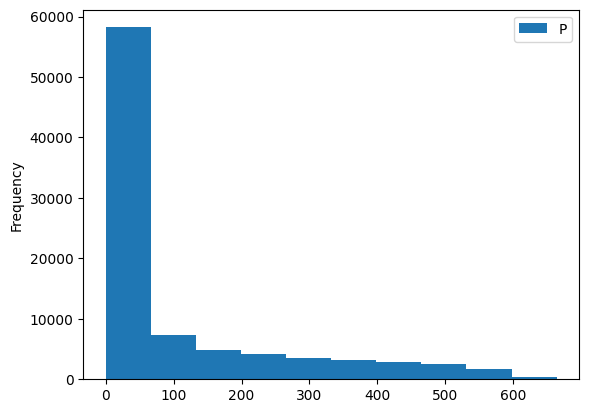

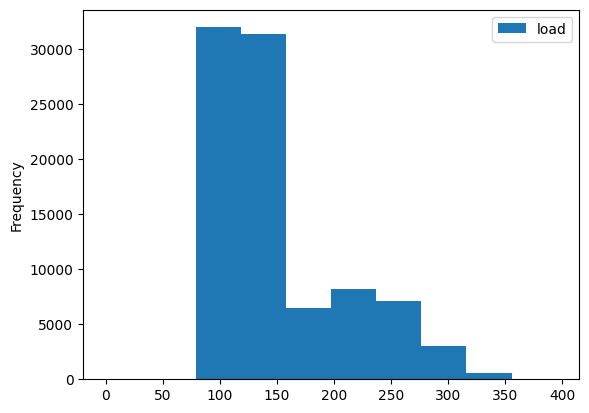

In [3]:
train_data.plot(y="P", kind='hist'), train_data.plot(y="load", kind='hist')

# Prepare Data

In [5]:
df = train_data.drop(columns=["dataset_id","residual_load"])
df["time"] = pd.to_datetime(df["time"])
df["timestamp"] = None
for i in range(len(df["time"])):
    df["timestamp"][i] = df["time"][i].timestamp()
# df["normalize time"] = (df["timestamp"] - df["timestamp"].min()) / (df["timestamp"].max() - df["timestamp"].min())
df = df.drop(columns=["time"])
df

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_13540\1876649345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["timestamp"][i] = df["time"][i].timestamp()


,P,Gb(i),Gd(i),H_sun,T2m,WS10m,load,timestamp
0,0.0,0.0,0.0,0.0,9.11,5.38,113.5,1514764800.0
1,0.0,0.0,0.0,0.0,8.89,5.43,119.0,1514765700.0
2,0.0,0.0,0.0,0.0,8.66,5.48,117.5,1514766600.0
3,0.0,0.0,0.0,0.0,8.44,5.54,114.5,1514767500.0
4,0.0,0.0,0.0,0.0,8.22,5.59,123.0,1514768400.0
...,...,...,...,...,...,...,...,...
88707,0.0,0.0,0.0,0.0,6.49,2.83,99.5,1602369900.0
88708,0.0,0.0,0.0,0.0,6.39,2.83,96.5,1602370800.0
88709,0.0,0.0,0.0,0.0,6.34,2.83,100.5,1602371700.0
88710,0.0,0.0,0.0,0.0,6.30,2.83,97.5,1602372600.0


# Forecast of P

In [5]:
# Normalization

df1 = df.drop(columns=["load"])
df1 = np.asarray(df1).astype(float)
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df1)
df1 = pd.DataFrame(normalizer(df1))
df1.columns = ["P","Gb(i)","Gd(i)","H_sun","T2m","WS10m","timestamp"]

train_dataset_P = df1.sample(frac=0.6, random_state=1)
test_dataset_P = df1.drop(train_dataset_P.index)

# Train data
train_features_P = train_dataset_P.drop(columns="P")
train_labels_P = train_dataset_P.drop(columns=["Gb(i)","Gd(i)","H_sun","T2m","WS10m","timestamp"])

# Test data

test_features_P = test_dataset_P.drop(columns="P")

test_labels_P = test_dataset_P.drop(columns=["Gb(i)","Gd(i)","H_sun","T2m","WS10m","timestamp"])

# Transform into array float
train_features_P = np.asarray(train_features_P).astype(float)
train_labels_P = np.asarray(train_labels_P).astype(float)
test_features_P = np.asarray(test_features_P).astype(float)
test_labels_P = np.asarray(test_labels_P).astype(float)

# Print the shape

print("train_features_P : ", train_features_P.shape, train_features_P)

print("train_labels_P : " , train_labels_P.shape, train_labels_P)

print("test_features_P : ", test_features_P.shape)

print("test_labels_P : ", test_labels_P.shape)

train_features_P :  (53227, 6) [[-0.48000094 -0.71319681 -0.75746679  0.72796893  0.68520927 -1.3153187 ]
 [-0.48000094  0.49774638  0.79475862  0.48733303  1.26357222  1.66589761]
 [-0.47238755 -0.41114628 -0.41749322  0.62538207 -0.77900016 -1.27507854]
 ...
 [-0.19023491  0.69436908  0.34504312 -0.33589515  0.37040436 -0.04324249]
 [-0.48000094 -0.71319681 -0.75746679  0.76089805 -0.44955307  1.44642675]
 [-0.48000094 -0.71319681 -0.75746679  0.69377321 -0.80096334 -1.21291339]]
train_labels_P :  (53227, 1) [[-0.63315672]
 [-0.00279962]
 [-0.57700408]
 ...
 [-0.11689778]
 [-0.63315672]
 [-0.63315672]]
test_features_P :  (35485, 6)
test_labels_P :  (35485, 1)


Epoch 1/1000
888/888 [==============================] - 2s 1ms/step - loss: 0.7803 - mean_absolute_error: 0.7803 - val_loss: 0.7768 - val_mean_absolute_error: 0.7768
Epoch 2/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.7790 - mean_absolute_error: 0.7790 - val_loss: 0.7753 - val_mean_absolute_error: 0.7753
Epoch 3/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.7774 - mean_absolute_error: 0.7774 - val_loss: 0.7734 - val_mean_absolute_error: 0.7734
Epoch 4/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.7753 - mean_absolute_error: 0.7753 - val_loss: 0.7708 - val_mean_absolute_error: 0.7708
Epoch 5/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.7726 - mean_absolute_error: 0.7726 - val_loss: 0.7676 - val_mean_absolute_error: 0.7676
Epoch 6/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.7691 - mean_absolute_error: 0.7691 - val_loss: 0.7635 - val_mean_absolute_error: 0.7635
Epoc

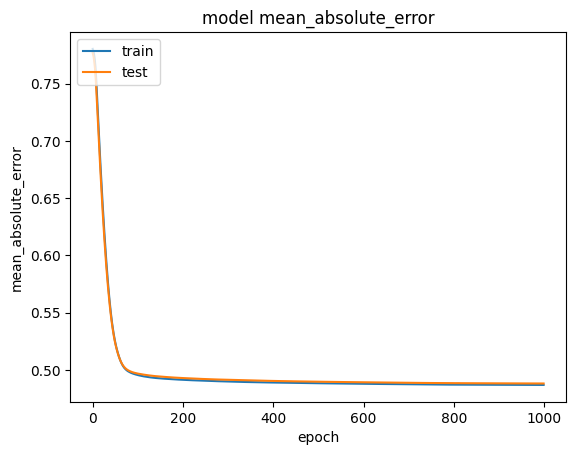

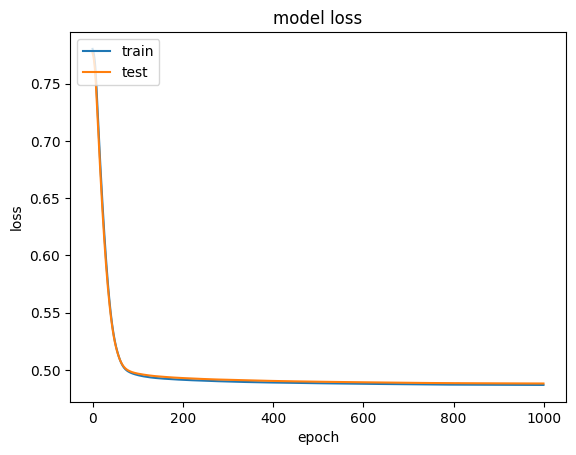

555/555 [==============================] - 0s 776us/step
[0.48580712]


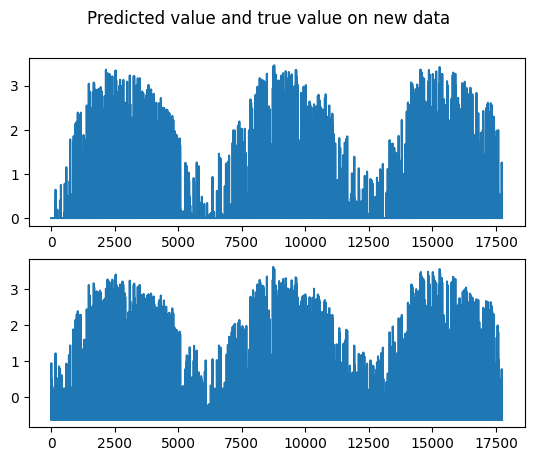

In [11]:
# Model
model = keras.Sequential([
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='relu'),
])

# Training
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=tf.keras.metrics.MeanAbsoluteError()
    )

# Fitting
history = model.fit(
    x = train_features_P,
    y = train_labels_P,
    batch_size=64,
    epochs=1000,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    )

# Summarize history for mean_absolute_error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Prediction
y = model.predict(test_features_P)
fig, axs = plt.subplots(2)
fig.suptitle('Predicted value and true value on new data')
axs[0].plot(y)
axs[1].plot(test_labels_P)

somme = 0
for i in range(len(y)):
    somme = somme + abs(y[i]-test_labels_P[i])
MAE = somme/len(y)
print(MAE)


In [6]:
# Model 
model = keras.Sequential([
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='relu'),
])

# Training
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=tf.keras.metrics.MeanAbsoluteError()
    )

# Fitting
history = model.fit(
    x = train_features_P,
    y = train_labels_P,
    batch_size=64,
    epochs=1000,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    )

# Serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")



Epoch 1/1000
888/888 [==============================] - 2s 1ms/step - loss: 0.9844 - mean_absolute_error: 0.9844 - val_loss: 0.9670 - val_mean_absolute_error: 0.9670
Epoch 2/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.9557 - mean_absolute_error: 0.9557 - val_loss: 0.9398 - val_mean_absolute_error: 0.9398
Epoch 3/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.9302 - mean_absolute_error: 0.9302 - val_loss: 0.9157 - val_mean_absolute_error: 0.9157
Epoch 4/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.9074 - mean_absolute_error: 0.9074 - val_loss: 0.8941 - val_mean_absolute_error: 0.8941
Epoch 5/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.8869 - mean_absolute_error: 0.8869 - val_loss: 0.8746 - val_mean_absolute_error: 0.8746
Epoch 6/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.8684 - mean_absolute_error: 0.8684 - val_loss: 0.8570 - val_mean_absolute_error: 0.8570
Epoc

In [7]:
# Model
model1 = keras.Sequential([
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='relu'),
])

# Training
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=tf.keras.metrics.MeanAbsoluteError()
    )

# Fitting
history = model1.fit(
    x = train_features_P,
    y = train_labels_P,
    batch_size=64,
    epochs=1000,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    )

# Serialize model to JSON
model_json1 = model1.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json1)

# Serialize weights to HDF5
model1.save_weights("model1.h5")
print("Saved model1 to disk")



Epoch 1/1000
888/888 [==============================] - 2s 1ms/step - loss: 0.7424 - mean_absolute_error: 0.7424 - val_loss: 0.7359 - val_mean_absolute_error: 0.7359
Epoch 2/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.7355 - mean_absolute_error: 0.7355 - val_loss: 0.7291 - val_mean_absolute_error: 0.7291
Epoch 3/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.7287 - mean_absolute_error: 0.7287 - val_loss: 0.7224 - val_mean_absolute_error: 0.7224
Epoch 4/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.7220 - mean_absolute_error: 0.7220 - val_loss: 0.7157 - val_mean_absolute_error: 0.7157
Epoch 5/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.7153 - mean_absolute_error: 0.7153 - val_loss: 0.7091 - val_mean_absolute_error: 0.7091
Epoch 6/1000
888/888 [==============================] - 1s 1ms/step - loss: 0.7086 - mean_absolute_error: 0.7086 - val_loss: 0.7024 - val_mean_absolute_error: 0.7024
Epoc

In [10]:
# load json and create model
json_file = open('model1.json', 'r')
loaded_model1_json = json_file.read()
json_file.close()
loaded_model1 = model_from_json(loaded_model1_json)

# load weights into new model
loaded_model1.load_weights("model1.h5")
print("Loaded model1 from disk")

Loaded model1 from disk


555/555 [==============================] - 1s 775us/step
[0.48659057]


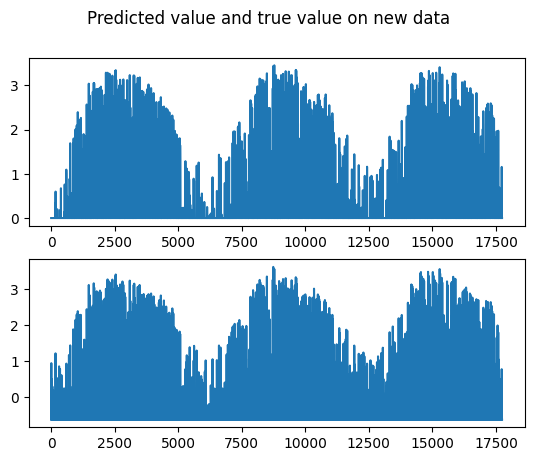

In [11]:
# Prediction
y = loaded_model1.predict(test_features_P)
fig, axs = plt.subplots(2)
fig.suptitle('Predicted value and true value on new data')
axs[0].plot(y)
axs[1].plot(test_labels_P)

somme = 0
for i in range(len(y)):
    somme = somme + abs(y[i]-test_labels_P[i])
MAE = somme/len(y)
print(MAE)

In [6]:
# Model
model2 = keras.Sequential([
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='relu'),
])

# Training
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=tf.keras.metrics.MeanAbsoluteError()
    )

# Fitting
history = model2.fit(
    x = train_features_P,
    y = train_labels_P,
    batch_size=64,
    epochs=5000,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    )

# Serialize model to JSON
model_json2 = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json2)

# Serialize weights to HDF5
model2.save_weights("model2.h5")
print("Saved model2 to disk")

Epoch 1/5000
666/666 [==============================] - 2s 2ms/step - loss: 0.8137 - mean_absolute_error: 0.8137 - val_loss: 0.8121 - val_mean_absolute_error: 0.8121
Epoch 2/5000
666/666 [==============================] - 1s 2ms/step - loss: 0.8068 - mean_absolute_error: 0.8068 - val_loss: 0.8058 - val_mean_absolute_error: 0.8058
Epoch 3/5000
666/666 [==============================] - 1s 1ms/step - loss: 0.8013 - mean_absolute_error: 0.8013 - val_loss: 0.8007 - val_mean_absolute_error: 0.8007
Epoch 4/5000
666/666 [==============================] - 1s 1ms/step - loss: 0.7968 - mean_absolute_error: 0.7968 - val_loss: 0.7966 - val_mean_absolute_error: 0.7966
Epoch 5/5000
666/666 [==============================] - 1s 1ms/step - loss: 0.7933 - mean_absolute_error: 0.7933 - val_loss: 0.7933 - val_mean_absolute_error: 0.7933
Epoch 6/5000
666/666 [==============================] - 1s 2ms/step - loss: 0.7905 - mean_absolute_error: 0.7905 - val_loss: 0.7908 - val_mean_absolute_error: 0.7908
Epoc

Loaded model2 from disk
1109/1109 [==============================] - 1s 722us/step
[0.48636297]


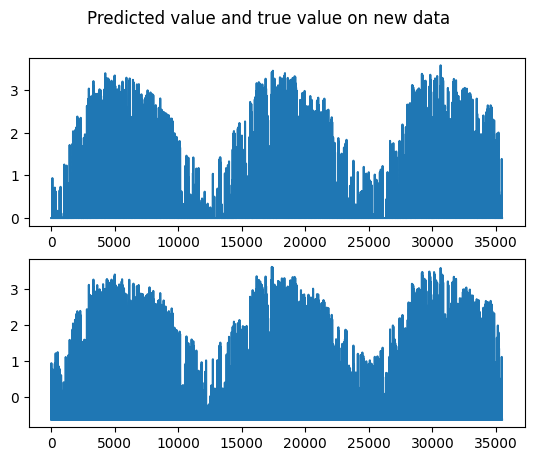

In [8]:
# load json and create model
json_file = open('model2.json', 'r')
loaded_model2_json = json_file.read()
json_file.close()
loaded_model2 = model_from_json(loaded_model2_json)

# load weights into new model
loaded_model2.load_weights("model2.h5")
print("Loaded model2 from disk")

# Prediction
y = loaded_model2.predict(test_features_P)
fig, axs = plt.subplots(2)
fig.suptitle('Predicted value and true value on new data')
axs[0].plot(y)
axs[1].plot(test_labels_P)

somme = 0
for i in range(len(y)):
    somme = somme + abs(y[i]-test_labels_P[i])
MAE = somme/len(y)
print(MAE)

# Forecast of Load with time

In [6]:
df2 = df.drop(columns=["Gb(i)","Gd(i)","H_sun","T2m","WS10m","P"])

df2 = np.asarray(df2).astype(float)
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df2)
df2 = pd.DataFrame(normalizer(df2))

print(df2)

train_dataset_Load = df2.sample(frac=0.8, random_state=1)
test_dataset_Load = df2.drop(train_dataset_Load.index)

train_features_Load = train_dataset_Load.drop(columns=0)
train_labels_Load = train_dataset_Load.drop(columns=1)

test_features_Load = test_dataset_Load.drop(columns=0)
test_labels_Load = test_dataset_Load.drop(columns=1)

train_features_Load = np.asarray(train_features_Load).astype(float)
train_labels_Load = np.asarray(train_labels_Load).astype(float)
test_features_Load = np.asarray(test_features_Load).astype(float)
test_labels_Load = np.asarray(test_labels_Load).astype(float)

# train_features_Load = np.abs(train_features_Load)
# train_labels_Load = np.abs(train_labels_Load)
# test_features_Load = np.abs(test_features_Load)
# test_labels_Load = np.abs(test_labels_Load)

print("train_features_Load : ",train_features_Load.shape, train_features_Load)

print("train_labels_Load : " ,train_labels_Load.shape, train_labels_Load)

print("test_features_Load : " ,test_features_Load.shape)

print("test_labels_Load : ", test_labels_Load.shape)

              0         1
0     -0.671817 -1.718177
1     -0.572992 -1.718142
2     -0.599944 -1.718107
3     -0.653849 -1.718072
4     -0.501120 -1.718037
...         ...       ...
88707 -0.923370  1.718001
88708 -0.977274  1.718037
88709 -0.905401  1.718072
88710 -0.959306  1.718107
88711 -0.869465  1.718142

[88712 rows x 2 columns]
train_features_Load :  (70970, 1) [[-1.3153187 ]
 [ 1.66589761]
 [-1.27507854]
 ...
 [-1.33247912]
 [-0.55546486]
 [-0.81358433]]
train_labels_Load :  (70970, 1) [[-0.9143855 ]
 [-0.14175893]
 [-0.78860909]
 ...
 [-0.51908821]
 [-0.42026386]
 [-0.72572088]]
test_features_Load :  (17742, 1)
test_labels_Load :  (17742, 1)


In [27]:
# Model
model_Load= keras.Sequential([
    layers.Dense(1, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1),
])

# Training
model_Load.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
    loss='mean_absolute_error',
    metrics='mean_absolute_percentage_error'
    )

# Fitting
model_Load.fit(
    x = train_features_Load,
    y = train_labels_Load,
    batch_size=100,
    epochs=100,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    )
# Serialize model to JSON
model_json_load = model_Load.to_json()
with open("model_json_load.json", "w") as json_file:
    json_file.write(model_json_load)

# Serialize weights to HDF5
model_Load.save_weights("model_load.h5")
print("Saved model_load to disk")



Epoch 1/100
426/426 [==============================] - 2s 2ms/step - loss: 0.8847 - mean_absolute_percentage_error: 135.9845 - val_loss: 0.8938 - val_mean_absolute_percentage_error: 137.3690
Epoch 2/100
426/426 [==============================] - 1s 2ms/step - loss: 0.8824 - mean_absolute_percentage_error: 134.9328 - val_loss: 0.8914 - val_mean_absolute_percentage_error: 136.3476
Epoch 3/100
426/426 [==============================] - 1s 2ms/step - loss: 0.8801 - mean_absolute_percentage_error: 133.8661 - val_loss: 0.8891 - val_mean_absolute_percentage_error: 135.3441
Epoch 4/100
426/426 [==============================] - 1s 2ms/step - loss: 0.8778 - mean_absolute_percentage_error: 132.8422 - val_loss: 0.8868 - val_mean_absolute_percentage_error: 134.3495
Epoch 5/100
426/426 [==============================] - 1s 2ms/step - loss: 0.8756 - mean_absolute_percentage_error: 131.8420 - val_loss: 0.8846 - val_mean_absolute_percentage_error: 133.3813
Epoch 6/100
426/426 [========================

Loaded model_load from disk
1109/1109 [==============================] - 1s 904us/step
[0.71421173]


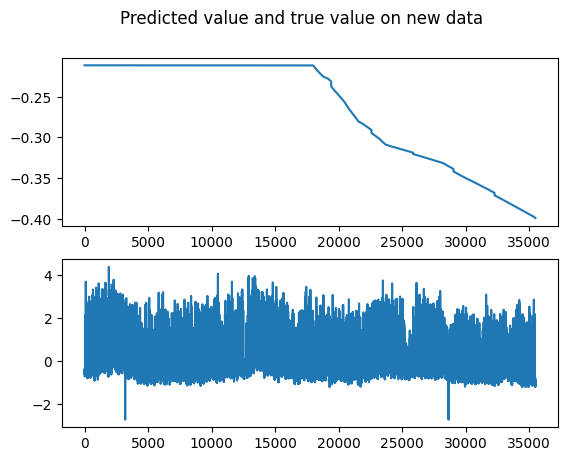

In [29]:
# load json and create model
json_file = open('model_json_load.json', 'r')
loaded_model_load_json = json_file.read()
json_file.close()
loaded_model_load = model_from_json(loaded_model_load_json)

# load weights into new model
loaded_model_load.load_weights("model_load.h5")
print("Loaded model_load from disk")

# Prediction
y = loaded_model_load.predict(test_features_Load)
fig, axs = plt.subplots(2)
fig.suptitle('Predicted value and true value on new data')
axs[0].plot(y)
axs[1].plot(test_labels_Load)

somme = 0
for i in range(len(y)):
    somme = somme + abs(y[i]- test_labels_Load[i])
MAE = somme/len(y)
print(MAE)

In [32]:
# Model
model_Load_1= keras.Sequential([
    layers.Dense(1, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1),
])

# Training
model_Load_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='mean_absolute_error',
    metrics='mean_absolute_percentage_error'
    )

# Fitting
model_Load_1.fit(
    x = train_features_Load,
    y = train_labels_Load,
    batch_size=100,
    epochs=100,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    )
# Serialize model to JSON
model_json_load_1 = model_Load_1.to_json()
with open("model_json_load_1.json", "w") as json_file:
    json_file.write(model_json_load_1)

# Serialize weights to HDF5
model_Load_1.save_weights("model_load_1.h5")
print("Saved model_load_1 to disk")



Epoch 1/100
497/497 [==============================] - 3s 2ms/step - loss: 0.8050 - mean_absolute_percentage_error: 99.1954 - val_loss: 0.8006 - val_mean_absolute_percentage_error: 98.6346
Epoch 2/100
497/497 [==============================] - 1s 2ms/step - loss: 0.8000 - mean_absolute_percentage_error: 98.1422 - val_loss: 0.7956 - val_mean_absolute_percentage_error: 97.7272
Epoch 3/100
497/497 [==============================] - 1s 2ms/step - loss: 0.7951 - mean_absolute_percentage_error: 97.3554 - val_loss: 0.7907 - val_mean_absolute_percentage_error: 97.0234
Epoch 4/100
497/497 [==============================] - 1s 2ms/step - loss: 0.7902 - mean_absolute_percentage_error: 96.7108 - val_loss: 0.7859 - val_mean_absolute_percentage_error: 96.4581
Epoch 5/100
497/497 [==============================] - 1s 2ms/step - loss: 0.7853 - mean_absolute_percentage_error: 96.2380 - val_loss: 0.7810 - val_mean_absolute_percentage_error: 95.9943
Epoch 6/100
497/497 [==============================] - 

Loaded model_load_1 from disk
832/832 [==============================] - 1s 964us/step
[0.43185964]


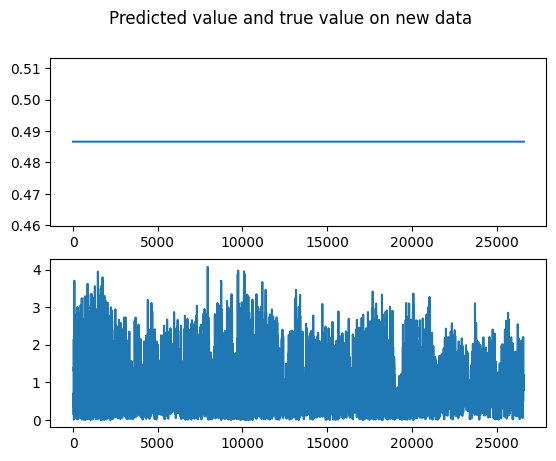

In [33]:
# load json and create model
json_file = open('model_json_load_1.json', 'r')
loaded_model_load_json = json_file.read()
json_file.close()
loaded_model_load_1 = model_from_json(loaded_model_load_json)

# load weights into new model
loaded_model_load_1.load_weights("model_load_1.h5")
print("Loaded model_load_1 from disk")

# Prediction
y = loaded_model_load_1.predict(test_features_Load)
fig, axs = plt.subplots(2)
fig.suptitle('Predicted value and true value on new data')
axs[0].plot(y)
axs[1].plot(test_labels_Load)

somme = 0
for i in range(len(y)):
    somme = somme + abs(y[i]- test_labels_Load[i])
MAE = somme/len(y)
print(MAE)

In [34]:
# Model
model_Load_2= keras.Sequential([
    layers.Dense(1, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1),
])

# Training
model_Load_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='mean_absolute_error',
    metrics='mean_absolute_percentage_error'
    )

# Fitting
model_Load_2.fit(
    x = train_features_Load,
    y = train_labels_Load,
    batch_size=100,
    epochs=100,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    )
# Serialize model to JSON
model_json_load_2 = model_Load_2.to_json()
with open("model_json_load_2.json", "w") as json_file:
    json_file.write(model_json_load_2)

# Serialize weights to HDF5
model_Load_2.save_weights("model_load_2.h5")
print("Saved model_load_2 to disk")



Epoch 1/100
497/497 [==============================] - 1s 2ms/step - loss: 0.6553 - mean_absolute_percentage_error: 101.6263 - val_loss: 0.6223 - val_mean_absolute_percentage_error: 106.8451
Epoch 2/100
497/497 [==============================] - 1s 1ms/step - loss: 0.5949 - mean_absolute_percentage_error: 109.3357 - val_loss: 0.5662 - val_mean_absolute_percentage_error: 115.9567
Epoch 3/100
497/497 [==============================] - 1s 1ms/step - loss: 0.5439 - mean_absolute_percentage_error: 119.5540 - val_loss: 0.5196 - val_mean_absolute_percentage_error: 127.1455
Epoch 4/100
497/497 [==============================] - 1s 1ms/step - loss: 0.5030 - mean_absolute_percentage_error: 131.3603 - val_loss: 0.4838 - val_mean_absolute_percentage_error: 139.4838
Epoch 5/100
497/497 [==============================] - 1s 1ms/step - loss: 0.4733 - mean_absolute_percentage_error: 144.2973 - val_loss: 0.4590 - val_mean_absolute_percentage_error: 151.9465
Epoch 6/100
497/497 [========================

Loaded model_load_2 from disk
832/832 [==============================] - 1s 804us/step
[0.39048467]


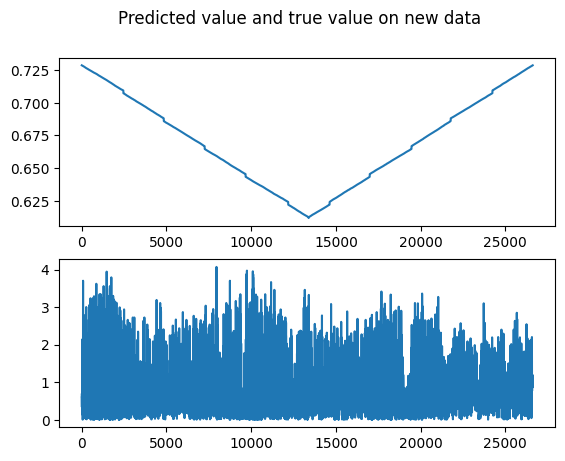

In [35]:
# load json and create model
json_file = open('model_json_load_2.json', 'r')
loaded_model_load_json = json_file.read()
json_file.close()
loaded_model_load_2 = model_from_json(loaded_model_load_json)

# load weights into new model
loaded_model_load_2.load_weights("model_load_2.h5")
print("Loaded model_load_2 from disk")

# Prediction
y = loaded_model_load_2.predict(test_features_Load)
fig, axs = plt.subplots(2)
fig.suptitle('Predicted value and true value on new data')
axs[0].plot(y)
axs[1].plot(test_labels_Load)

somme = 0
for i in range(len(y)):
    somme = somme + abs(y[i]- test_labels_Load[i])
MAE = somme/len(y)
print(MAE)

In [41]:
# Model
model1 = keras.Sequential([
    layers.Dense(1, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1),
])

# Training
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=10**-3),
    loss='mean_absolute_error',
    metrics='mean_absolute_percentage_error'
    )

# Fitting
history1 = model1.fit(
    x = train_features_Load,
    y = train_labels_Load,
    batch_size=100,
    epochs=100,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    )

Epoch 1/100
497/497 [==============================] - 1s 2ms/step - loss: 0.7050 - mean_absolute_percentage_error: 151.3858 - val_loss: 0.6946 - val_mean_absolute_percentage_error: 153.0230
Epoch 2/100
497/497 [==============================] - 1s 1ms/step - loss: 0.6954 - mean_absolute_percentage_error: 155.9355 - val_loss: 0.6940 - val_mean_absolute_percentage_error: 148.4150
Epoch 3/100
497/497 [==============================] - 1s 1ms/step - loss: 0.6945 - mean_absolute_percentage_error: 155.5609 - val_loss: 0.6944 - val_mean_absolute_percentage_error: 141.0130
Epoch 4/100
497/497 [==============================] - 1s 1ms/step - loss: 0.6938 - mean_absolute_percentage_error: 154.3264 - val_loss: 0.6929 - val_mean_absolute_percentage_error: 153.5641
Epoch 5/100
497/497 [==============================] - 1s 1ms/step - loss: 0.6931 - mean_absolute_percentage_error: 154.6462 - val_loss: 0.6921 - val_mean_absolute_percentage_error: 150.2334
Epoch 6/100
497/497 [========================

In [42]:
# Serialize model to JSON
model_json_load_3 = model1.to_json()
with open("model_json_load_3.json", "w") as json_file:
    json_file.write(model_json_load_3)

# Serialize weights to HDF5
model1.save_weights("model_load_3.h5")
print("Saved model_load_3 to disk")

Saved model_load_3 to disk


Loaded model_load_3 from disk
832/832 [==============================] - 1s 773us/step
[0.67463917]


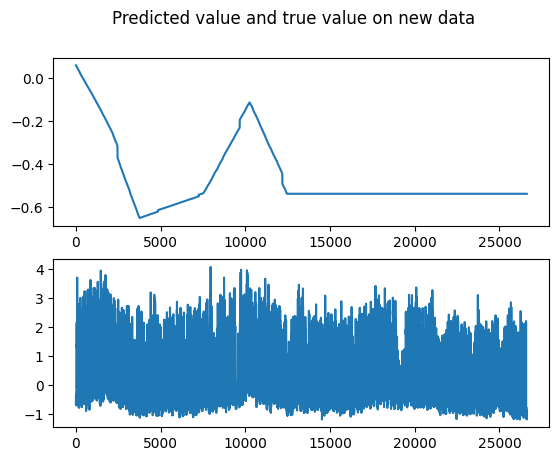

In [43]:
# load json and create model
json_file = open('model_json_load_3.json', 'r')
loaded_model_load_json = json_file.read()
json_file.close()
loaded_model_load_3 = model_from_json(loaded_model_load_json)

# load weights into new model
loaded_model_load_3.load_weights("model_load_3.h5")
print("Loaded model_load_3 from disk")

# Prediction
y = loaded_model_load_3.predict(test_features_Load)
fig, axs = plt.subplots(2)
fig.suptitle('Predicted value and true value on new data')
axs[0].plot(y)
axs[1].plot(test_labels_Load)

somme = 0
for i in range(len(y)):
    somme = somme + abs(y[i]- test_labels_Load[i])
MAE = somme/len(y)
print(MAE)

In [55]:
# Model
model4 = keras.Sequential([
    layers.Dense(1, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(1),
])

# Training
model4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=10**-3),
    loss='mean_absolute_error',
    metrics='mean_absolute_percentage_error'
    )

# Fitting
history4 = model4.fit(
    x = train_features_Load,
    y = train_labels_Load,
    batch_size=100,
    epochs=1000,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2,
    )

# Serialize model to JSON
model_json_load_4 = model4.to_json()
with open("model_json_load_4.json", "w") as json_file:
    json_file.write(model_json_load_4)

# Serialize weights to HDF5
model4.save_weights("model_load_4.h5")
print("Saved model_load_4 to disk")

Epoch 1/1000
568/568 [==============================] - 3s 3ms/step - loss: 0.6889 - mean_absolute_percentage_error: 150.9830 - val_loss: 0.6815 - val_mean_absolute_percentage_error: 146.0839
Epoch 2/1000
568/568 [==============================] - 1s 3ms/step - loss: 0.6825 - mean_absolute_percentage_error: 146.6238 - val_loss: 0.6823 - val_mean_absolute_percentage_error: 149.8782
Epoch 3/1000
568/568 [==============================] - 1s 3ms/step - loss: 0.6822 - mean_absolute_percentage_error: 145.2628 - val_loss: 0.6803 - val_mean_absolute_percentage_error: 144.3785
Epoch 4/1000
568/568 [==============================] - 1s 3ms/step - loss: 0.6813 - mean_absolute_percentage_error: 144.4617 - val_loss: 0.6840 - val_mean_absolute_percentage_error: 156.2893
Epoch 5/1000
568/568 [==============================] - 2s 3ms/step - loss: 0.6813 - mean_absolute_percentage_error: 143.9341 - val_loss: 0.6788 - val_mean_absolute_percentage_error: 141.1428
Epoch 6/1000
568/568 [==================

Loaded model_load_3 from disk
555/555 [==============================] - 1s 881us/step
[0.67049729]


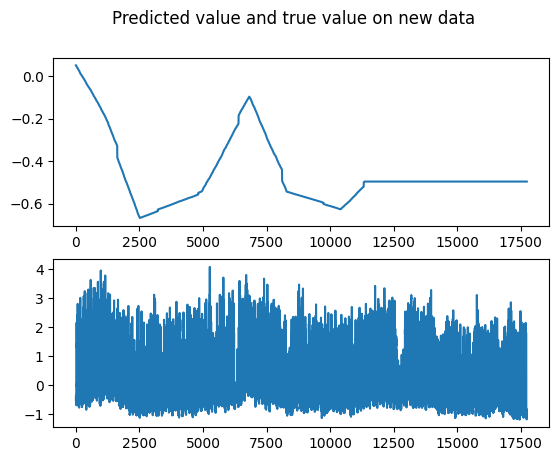

In [46]:
# load json and create model
json_file = open('model_json_load_4.json', 'r')
loaded_model_load_json = json_file.read()
json_file.close()
loaded_model_load_4 = model_from_json(loaded_model_load_json)

# load weights into new model
loaded_model_load_4.load_weights("model_load_4.h5")
print("Loaded model_load_3 from disk")

# Prediction
y = loaded_model_load_4.predict(test_features_Load)
fig, axs = plt.subplots(2)
fig.suptitle('Predicted value and true value on new data')
axs[0].plot(y)
axs[1].plot(test_labels_Load)

somme = 0
for i in range(len(y)):
    somme = somme + abs(y[i]- test_labels_Load[i])
MAE = somme/len(y)
print(MAE)

# Forecast of Residual_Load

In [109]:
test_data = pd.read_csv("./test.csv")
submission_data = pd.read_csv("./sample_submission.csv")
print(test_data,submission_data)

                     time  Gb(i)  Gd(i)  H_sun   T2m  WS10m  dataset_id
0     2018-03-26 00:00:00    0.0    0.0    0.0  1.76   1.52           1
1     2018-03-26 00:15:00    0.0    0.0    0.0  1.57   1.52           1
2     2018-03-26 00:30:00    0.0    0.0    0.0  1.38   1.52           1
3     2018-03-26 00:45:00    0.0    0.0    0.0  1.19   1.52           1
4     2018-03-26 01:00:00    0.0    0.0    0.0  1.00   1.52           1
...                   ...    ...    ...    ...   ...    ...         ...
7387  2020-10-17 22:45:00    0.0    0.0    0.0  4.25   1.38          11
7388  2020-10-17 23:00:00    0.0    0.0    0.0  4.16   1.38          11
7389  2020-10-17 23:15:00    0.0    0.0    0.0  4.06   1.40          11
7390  2020-10-17 23:30:00    0.0    0.0    0.0  3.96   1.42          11
7391  2020-10-17 23:45:00    0.0    0.0    0.0  3.86   1.43          11

[7392 rows x 7 columns]                      time  residual_load
0     2018-03-26 00:00:00      81.341719
1     2018-03-26 00:15:00    

In [110]:
df_test = test_data.drop(columns="dataset_id")
df_test["time"] = pd.to_datetime(df_test["time"])
df_test["timestamp"] = None
for i in range(len(df_test["time"])):
    df_test["timestamp"][i] = df_test["time"][i].timestamp()
df_test = df_test.drop(columns=["time"])
df_test

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_10544\512143352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["timestamp"][i] = df_test["time"][i].timestamp()


,Gb(i),Gd(i),H_sun,T2m,WS10m,timestamp
0,0.0,0.0,0.0,1.76,1.52,1522022400.0
1,0.0,0.0,0.0,1.57,1.52,1522023300.0
2,0.0,0.0,0.0,1.38,1.52,1522024200.0
3,0.0,0.0,0.0,1.19,1.52,1522025100.0
4,0.0,0.0,0.0,1.00,1.52,1522026000.0
...,...,...,...,...,...,...
7387,0.0,0.0,0.0,4.25,1.38,1602974700.0
7388,0.0,0.0,0.0,4.16,1.38,1602975600.0
7389,0.0,0.0,0.0,4.06,1.40,1602976500.0
7390,0.0,0.0,0.0,3.96,1.42,1602977400.0


In [111]:
df_test = np.asarray(df_test).astype(float)
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df_test)
# df_test_normalize = pd.DataFrame(normalizer(df_test))
df_test_normalize = np.asarray(normalizer(df_test)).astype(float)
df_test_normalize

array([[-0.44445732, -0.72327369, -0.76532763, -1.32579291, -0.89862698,
        -1.59298038],
       [-0.44445732, -0.72327369, -0.76532763, -1.35771048, -0.89862698,
        -1.5929451 ],
       [-0.44445732, -0.72327369, -0.76532763, -1.38962781, -0.89862698,
        -1.59290981],
       ...,
       [-0.44445732, -0.72327369, -0.76532763, -0.93942362, -0.9982149 ,
         1.59290981],
       [-0.44445732, -0.72327369, -0.76532763, -0.95622224, -0.98161691,
         1.5929451 ],
       [-0.44445732, -0.72327369, -0.76532763, -0.97302097, -0.97331792,
         1.59298038]])

In [112]:
submission_data = submission_data.drop(columns=["time"])
normalizer_2 = tf.keras.layers.Normalization(axis=-1)
normalizer_2.adapt(submission_data)
submission_data = normalizer_2(submission_data)
submission_data

<tf.Tensor: shape=(7392, 1), dtype=float32, numpy=
array([[-0.87585557],
       [-0.87585557],
       [-0.87585557],
       ...,
       [-0.87585557],
       [-0.87585557],
       [-0.87585557]], dtype=float32)>

Loaded model2 from disk
231/231 [==============================] - 0s 1ms/step


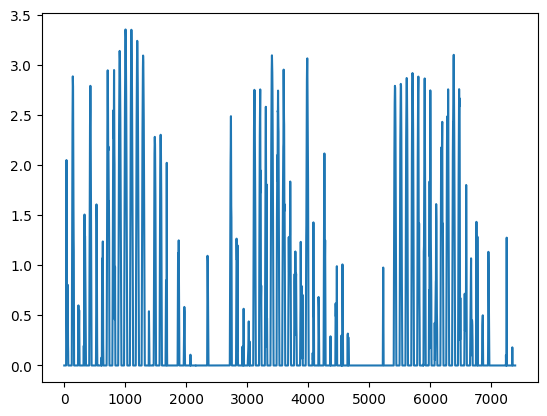

In [113]:
# load json and create model
json_file = open('model2.json', 'r')
loaded_model_load_json = json_file.read()
json_file.close()
loaded_model2 = model_from_json(loaded_model_load_json)

# load weights into new model
loaded_model2.load_weights("model2.h5")
print("Loaded model2 from disk")

# Prediction
y_P = loaded_model2.predict(df_test_normalize)
plt.plot(y_P)

In [117]:
df_test_noramlize_time = np.delete(df_test_normalize,[0,1,2,3,4],1)
print(df_test_noramlize_time)

[[-1.59298038]
 [-1.5929451 ]
 [-1.59290981]
 ...
 [ 1.59290981]
 [ 1.5929451 ]
 [ 1.59298038]]


Loaded model_load_4 from disk
231/231 [==============================] - 0s 1ms/step


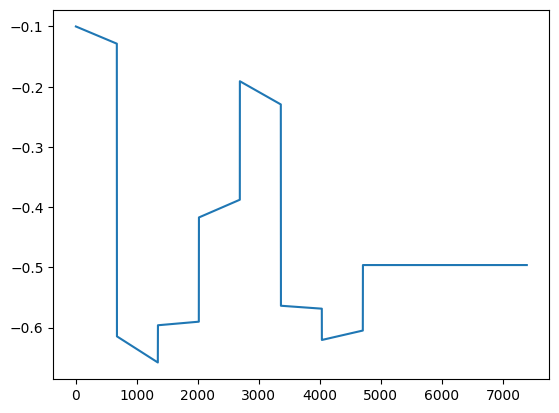

In [119]:
# load json and create model
json_file = open('model_json_load_4.json', 'r')
loaded_model_load_json = json_file.read()
json_file.close()
loaded_model_load_4 = model_from_json(loaded_model_load_json)

# load weights into new model
loaded_model_load_4.load_weights("model_load_4.h5")
print("Loaded model_load_4 from disk")

# Prediction
y_load = loaded_model_load_4.predict(df_test_noramlize_time)
plt.plot(y_load)

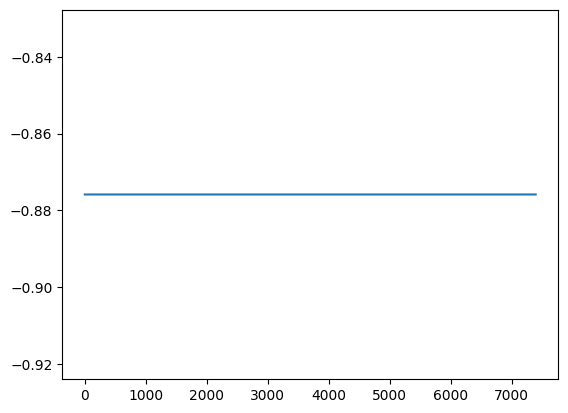

In [132]:
y_residual_load = y_P-y_load
y_residual_load
# plt.plot(y_residual_load)
plt.plot(submission_data)

In [129]:
somme = 0
for i in range(len(y_residual_load)):
    somme = somme + abs(y_residual_load[i]- submission_data[i])
MAE = somme/len(y_residual_load)
MAE

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.7140983], dtype=float32)>